In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as pl

In [24]:
im = np.array(Image.open('C:/Users/cnsl/Documents/COMPUTER VISION/ch10_notebook/4.jpg'))
print("Shape is: {0} of type {1}".format(im.shape, im.dtype))

# read grayscale version to float array
im = np.array(Image.open('C:/Users/cnsl/Documents/COMPUTER VISION/ch10_notebook/4.jpg').convert('L'),'f')
print("Shape is: {0} of type {1}".format(im.shape, im.dtype))

# visualize the pixel value of a small region
col_1, col_2 = 190, 225
row_1, row_2 = 230, 265

# crop using array slicing
crop = im[col_1:col_2,row_1:row_2]
cols, rows = crop.shape

print("Created crop of shape: {0}".format(crop.shape))

Shape is: (960, 960, 3) of type uint8
Shape is: (960, 960) of type float32
Created crop of shape: (35, 35)


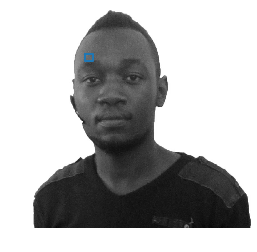

In [12]:
# generate all the plots
pl.figure()
pl.imshow(im)
pl.gray()
pl.plot([row_1, row_2, row_2, row_1, row_1], [col_1, col_1, col_2, col_2, col_1], linewidth=2)
pl.axis('off')
pl.show()

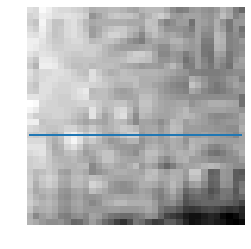

In [13]:
pl.figure()
pl.imshow(crop)
pl.gray()
pl.plot(20*np.ones(cols), linewidth=2)
pl.axis('off')
pl.show()

In [14]:
print(10*np.ones(cols)) 
range(10)

[10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]


range(0, 10)

In [ ]:
range(0, 10)

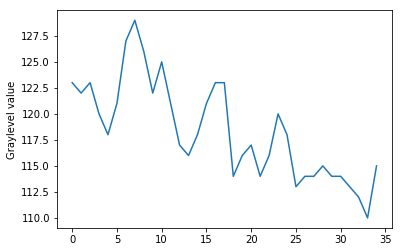

In [15]:
pl.figure()
pl.plot(crop[20,:])
pl.ylabel("Graylevel value")
pl.show()

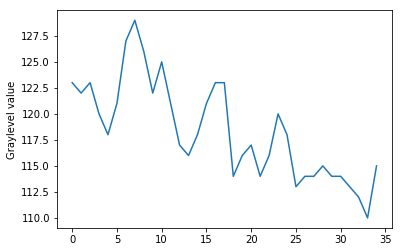

In [16]:
pl.figure()
pl.plot(crop[20,:])
pl.ylabel("Graylevel value")
pl.show()

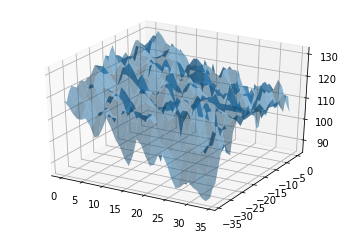

In [17]:

from mpl_toolkits.mplot3d import axes3d
fig = pl.figure()
ax = fig.gca(projection='3d')
# surface plot with transparency 0.5
X,Y = np.meshgrid(np.arange(cols),-np.arange(rows)) 
ax.plot_surface(X, Y, crop, alpha=0.5, cstride=2, rstride=2)
pl.show()

In [18]:
help(ax.plot_surface)

Help on method plot_surface in module mpl_toolkits.mplot3d.axes3d:

plot_surface(X, Y, Z, *args, norm=None, vmin=None, vmax=None, lightsource=None, **kwargs) method of matplotlib.axes._subplots.Axes3DSubplot instance
    Create a surface plot.
    
    By default it will be colored in shades of a solid color, but it also
    supports color mapping by supplying the *cmap* argument.
    
    .. note::
    
       The *rcount* and *ccount* kwargs, which both default to 50,
       determine the maximum number of samples used in each direction.  If
       the input data is larger, it will be downsampled (by slicing) to
       these numbers of points.
    
    Parameters
    ----------
    X, Y, Z : 2d arrays
        Data values.
    
    rcount, ccount : int
        Maximum number of samples used in each direction.  If the input
        data is larger, it will be downsampled (by slicing) to these
        numbers of points.  Defaults to 50.
    
        .. versionadded:: 2.0
    
    rstride

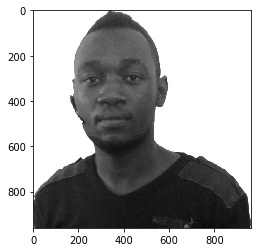

In [25]:
from PIL import Image
from numpy import *
from scipy.ndimage import measurements,morphology

"""
This is the morphology counting objects example in Section 1.4.
"""

# load image and threshold to make sure it is binary
im = array(Image.open('C:/Users/cnsl/Documents/COMPUTER VISION/ch10_notebook/4.jpg').convert('L'))
pl.figure();
pl.imshow(im)
pl.show();

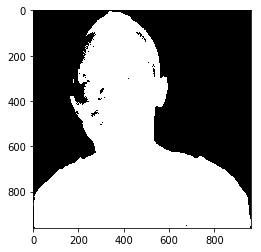

Number of objects: 83
Number of objects: 3


In [23]:
im = (im<128)
pl.figure();
pl.imshow(im)
pl.show();

labels, nbr_objects = measurements.label(im)
print("Number of objects:", nbr_objects)

# morphology - opening to separate objects better
im_open = morphology.binary_opening(im,ones((9,5)),iterations=2) 

labels_open, nbr_objects_open = measurements.label(im_open)
print("Number of objects:", nbr_objects_open)